## Visualizing Activation Functions - Lab

## Introduction

Now that you've built your own CNN and seen how to visualize feature maps, its time to practice loading a pretrained model from file and practice visualizing the learned features systematically. In this lab, you'll expand upon the code from the previous lesson in order to succinctly visualize all the channels from each layer in a CNN.

## Objectives

You will be able to:

* Load a saved model
* Visualize the filters produced by hidden layers in a CNN

## Load a Model  

For this lab, we have saved a model **chest_xray_all_with_augmentation_data.h5**.  
This saved file includes both the model architecture and the trained weights. See the `model.save()` method for further details. The model was built in order to help identify patients with pneumonia. Start simply by loading the model and pulling up a summary of the layers. (To load the model use the `keras.models.load_model` method.) 

In [1]:
#Your code here
from bs_ds.imports import *
from keras import models

model = models.load_model('chest_xray_all_with_augmentation_data.h5')

View our documentation at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


To disable styled DataFrames run html_off() at the bottom of any cell.
 To re-enable use html_on() at the bottom of any cell.


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Load an Image

Before we plot the learned representations of the convolutional base, let's import an image and display it prior to processing. This will provide us a comparison to the transformations formed by the model's feature maps.   

Load and display the image **person3_virus_16.jpeg**.

In [3]:
#Your code here
import matplotlib.pyplot as plt
%matplotlib inline
imgPlt = plt.imread('person3_virus_16.jpeg')
# imgPlt= imgPlt/255
# plt.imshow(img)

from keras.preprocessing import image
img_file = 'person3_virus_16.jpeg'
img = image.load_img(img_file,target_size=(150,150))


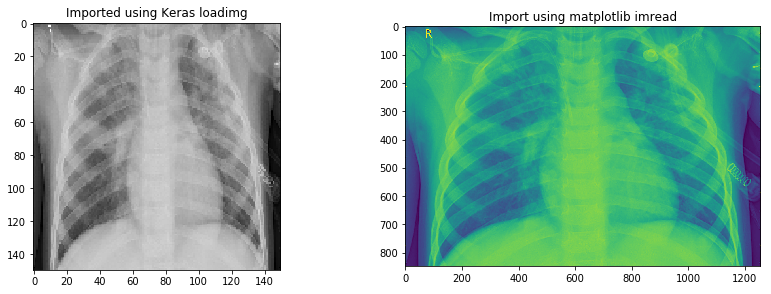

In [4]:
# Display both images
fig,ax = plt.subplots(2,2, figsize=(14,10))
ax[0,0].imshow(img)
ax[0,0].set_title('Imported using Keras loadimg')

ax[0,1].imshow(imgPlt)
ax[0,1].set_title('Import using matplotlib imread')

# ax[1,0].imshow(img_tensor[0])
# ax[1,0].set_title('Image_tensor')
plt.delaxes(ax[1,0])
plt.delaxes(ax[1,1])
plt.show()
# plt. plt.imshow(imgPlt)

## Transform the Image to a Tensor and Visualize Again

Recall that we will always preprocess our images into tensors when using deep learning. As such, preprocess this image and then redisplay the tensor.

(1, 150, 150, 3)


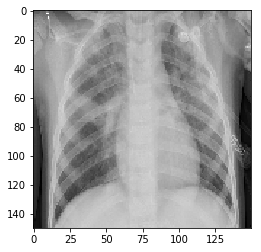

In [5]:
#Your code here
from keras.preprocessing import image
img_file = 'person3_virus_16.jpeg'
img = image.load_img(img_file,target_size=(150,150))

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor/=255.
# img_tensor.shape
print(img_tensor.shape)
plt.imshow(img_tensor[0])

## Plot Feature Maps

Now that we've loaded a model, practice visualizing each of the channels for each of feature maps of the convolutional layers. Recall that this process will take a few steps. First, extract the feature maps, or layer outputs from each of the activation functions in the model. From there, generate models that transform the image from its raw state to these feature maps. From there, you can then take these transformations and visualize each channel for each feature map.  

To preview the results of our solution code, take a sneek peak at the Intermediate_Activations_Visualized.pdf file.

In [6]:
def make_activations_model(model,idx_layers_to_show=None, verbose=True):
    """Accepts a Keras image convolution model and exports a new model,
    with just the intermediate activations to plot with plot_activations()."""
    import keras
    
    # If no image layer index provided, get all Conv2D and MaxPooling2D layers
    if idx_layers_to_show == None:
        layers_to_show = []
        
        # Check all layers for appropriate types
        for l,layer in enumerate(model.layers):
            
            check_type = type(layer)
            if check_type in [keras.layers.convolutional.Conv2D, keras.layers.pooling.MaxPooling2D]:
                layers_to_show.append(layer)
            
        # Create layer_output s
        layer_outputs = [layer.output for layer in layers_to_show]
        
    else:
        check_dims = shape(idx_layers_to_show)
        
        # Check if 2 index numbers provided
        if check_dims == 2:
            idx_start = idx_layers_to_show[0]
            idx_end = idx_layers_to_show[1]
        
            layer_outputs = [layer.output for layer in model.layers[idx_start:idx_end]]# exclude the flatten and dense layers
        
        elif check_dims == 1:
            
            layer_outputs = [layer.output for layer in model.layers[idx_layers_to_show]]# exclude the flatten and dense layers
                        
    # Now that we have layer_outputs, lets creat ethe activaiton_model
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    if verbose==True:
        print(activation_model.summary())
    
    return activation_model

In [7]:
# #Your code here
import math
activation_model = make_activations_model(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
__________

In [21]:
def plot_activations(activations_model,n_cols=16,process=True,colormap='viridis'):
    """Accepts an activations_model from make_activations_model. Plots all channels'
    outputs for every image layer in the model."""
    import math
    
    # Genearate activations from model
    activations = activation_model.predict(img_tensor)
    
    # Extract layer names for labels
    layer_names = []
#     for layer in model.layers[:8]:
    for layer in activations_model.layers:
        layer_names.append(layer.name)

    # Calculate the number of rows and columns for the figure
    total_features = sum([a.shape[-1] for a in activations]) # shape[-1] ==number of outputs
    n_rows = math.ceil(total_features / n_cols)

    # creat the figure and plots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols,n_rows*1.2) )

    iteration = 0
    for layer_n, layer_activation in enumerate(activations):
        n_channels = layer_activation.shape[-1]
        
        for ch_idx in range(n_channels):
            row = iteration // n_cols
            column = iteration % n_cols
            
            ax = axes[row, column]
            
            channel_image = layer_activation[0,:,:,ch_idx]
            
            if process==True:
                """create a z-score of the image"""
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                
                channel_image *= 64
                channel_image += 128
            
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            
            ax.imshow(channel_image, aspect='auto',cmap=colormap)
            
            # Remove x and y ticks
            ax.get_xaxis().set_ticks([])
            ax.get_yaxis().set_ticks([])
            
            # Add labels for first channel in layer
            if ch_idx == 0:
                ax.set_title(layer_names[layer_n],fontsize=10)
            iteration +=1
        
    # After all channels in a layer are finished:
    fig.subplots_adjust(hspace=1.25)
    plt.show()
    
    return fig, axes

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


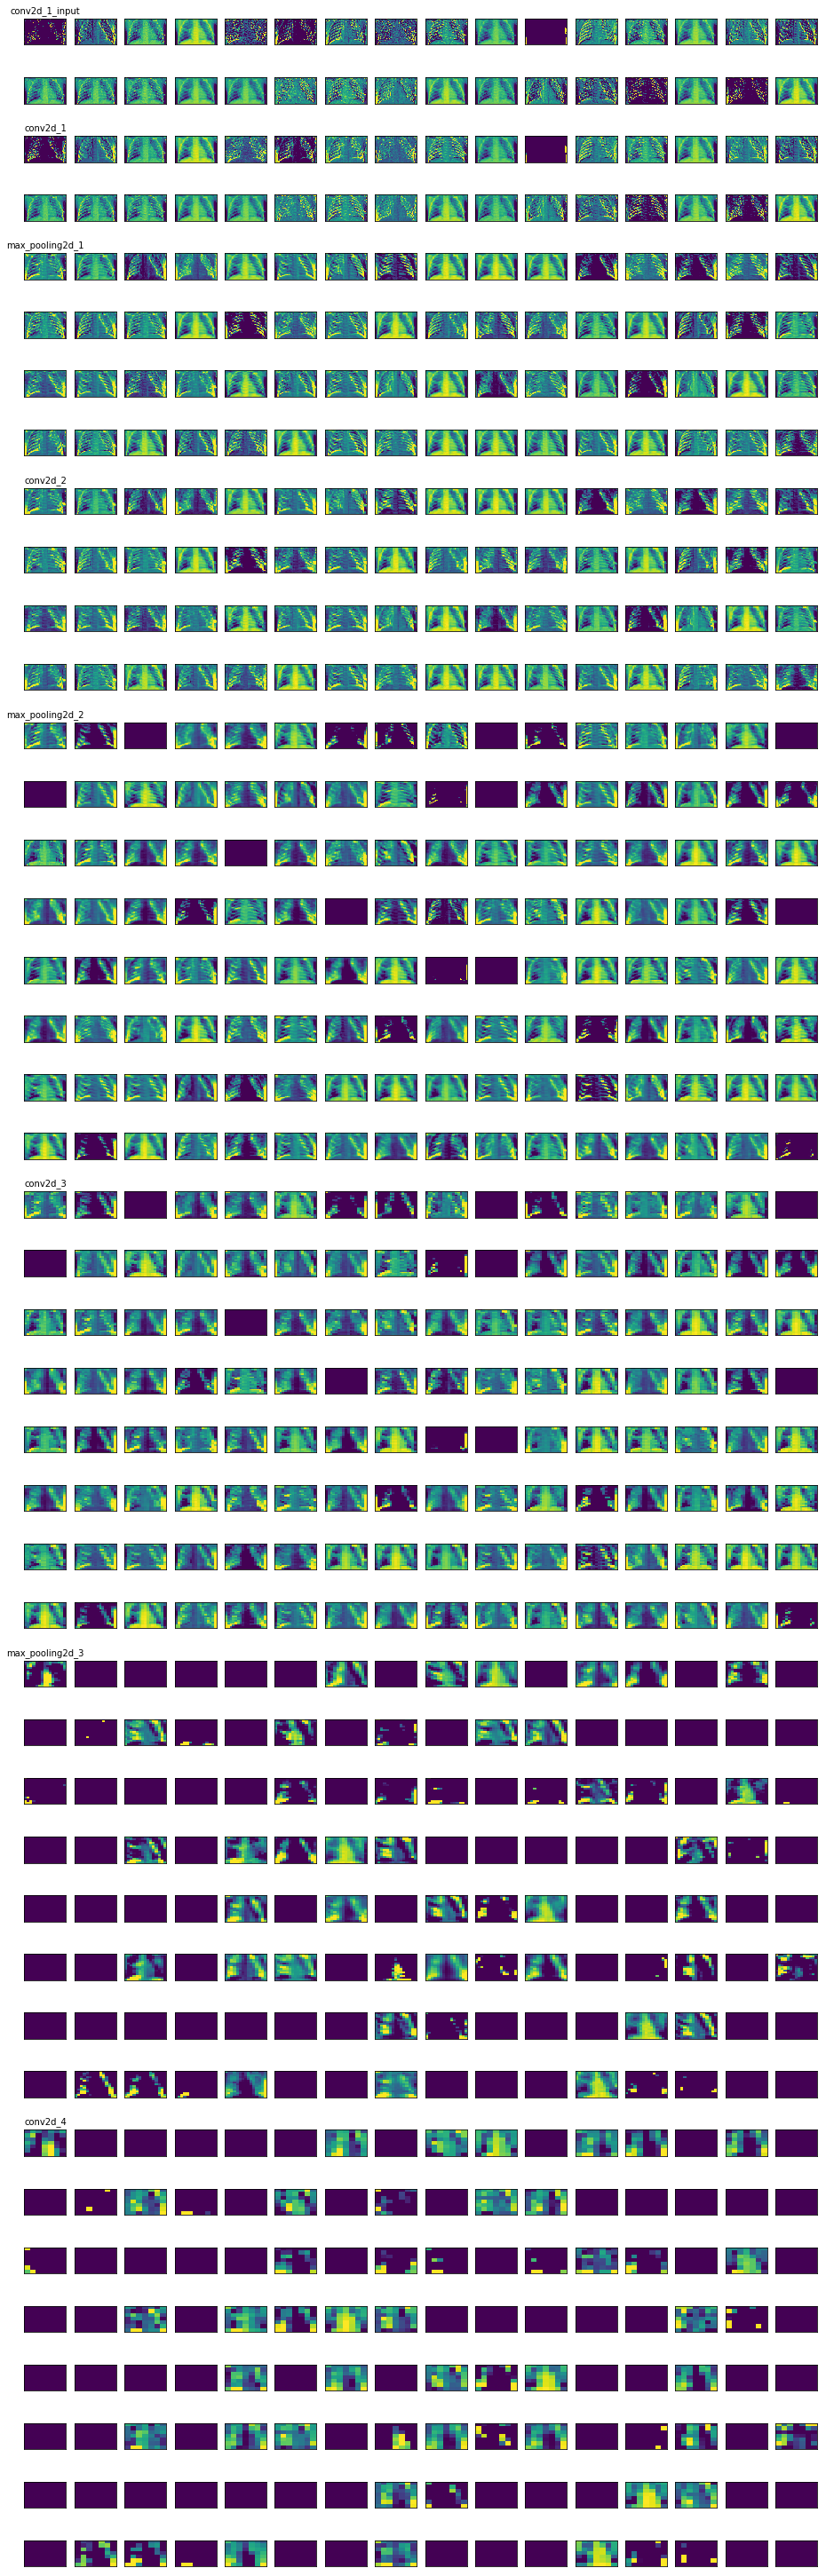

In [22]:
plot_activations(activation_model,n_cols=16)

## Summary

Nice work! In this lab, you practiced loading a model and then visualizing the activation feature maps learned by that model on your data! In the upcoming labs and sections you will build upon the first part of this and see how you can adapt the representations learned by more experienced models to your own applications which may have limited training data.